In [1]:
#Import Nescessary Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from matplotlib.patches import Patch

In [2]:
#Loading Forms
#Ignore Lines Starting With #
#Ensure You Put This File With Your Excel/CSV... In One Folder
#Change the form's name to yours and then just need to run the program!
df_month = pd.read_csv("page&screen-12312023-01272024.csv",comment="#")
#Filter Out Dirty Data
df_month = df_month[~df_month.iloc[:,0].str.contains('stage',#May subject to be changed anytime according to demand
                                                  flags=re.IGNORECASE)]

In [3]:
#Preview Data
#Check if you loaded it successfully
print(df_month.head())#5 rows as default

             Page path and screen class  Views  Users  Views per user  \
0                         /internships/   1920   1049        1.830315   
1  /internships/internship-application/   1708   1318        1.295903   
2                                     /   1703    800        2.128750   
3                     /start-a-chapter/    700    494        1.417004   
6        /internships/meet-our-interns/    405    320        1.265625   

   Average engagement time  Event count  Conversions  Total revenue  
0                27.534795         6584            0              0  
1                23.280728         4798            0              0  
2                35.522500         5093            0              0  
3                23.783401         1629            0              0  
6                70.337500         1241            0              0  


In [4]:
#Display What Kinds of Data We Are Analyzing
print(df_month.columns[0])

Page path and screen class


In [5]:
#Only Views; Users; Event count; Average engagement time; Views per user are meaningful here
#Below will be using bar charts & pie charts

In [6]:
#Bar Chart
subtitle_comb = "Last Month"
def barplot_pagescreen(column,
                       col="Page path and screen class",#Display what metric we are analyzing
                       num=25,#Num determines how many items on the graph, sorted and get the first num
                       figsize1=20,#Figure width
                       figsize2=20,#Figure height
                       xfont=30,#Xlabel fontsize
                       yfont=30,#Ylabel fontsize
                       titlefont=30,#Whole title fontsize
#                        labelfont=5,#Label fontsize
                       comlegend=5,#External legend fontsize
                       subfont=30,#Subtitle fontsize
                       textfont=15,#Text after bar: fontsize
                       legtitle=10#Legend Title Font Size
                       ):#When running functions, please adjust parameters if you want
    
    #Initialization
    plt.figure(figsize=(figsize1, figsize2))#Set fig size
    
    #Construction of plots
    df = df_month.sort_values(by=column, ascending=False)#Sort
    #We are only interested in the first 25 (default) largest (sorted)
    bars = plt.barh((df.head(num))[col], (df.head(num))[column])#Draw horizontal bar chart
    #Annotate each bar with the exact value
    for bar in bars:
        value = bar.get_width()#Get the width of the bar (the value that the bar represents)
        plt.text(value, bar.get_y() + bar.get_height()/2,#Place in the middle
                 f'{value}',#Text
                 va='center', ha='left',fontsize=textfont)#Locate text inside
    plt.xlabel(column,fontsize=xfont)#Label X-axis
    plt.ylabel("Page & Screen",fontsize=yfont)#Label Y-axis
    plt.title(subtitle_comb,fontsize=titlefont)#Set subtitle
    #Set legend
    #Create legend's content by looping
    legend_handles = [Patch(label=f"""{name}: {count1:.2f} views per user {count1:.2f} units eng. time on avg.
                                """)#Legend's content
                          for name, count1, count2 in 
                                (zip((df.head(num))[col],
                                     (df.head(num))["Views per user"],
                                     (df.head(num))["Average engagement time"]
                                    ))
                                ]
    #Place the legend outside
    plt.legend(handles=legend_handles, title="Views / User & Avg. Eng. Time",
                   fontsize=comlegend, bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=legtitle)
    plt.suptitle(f"{column} For {col}",fontsize=subfont)#Set whole title
    
    #Show
    plt.show()#Display

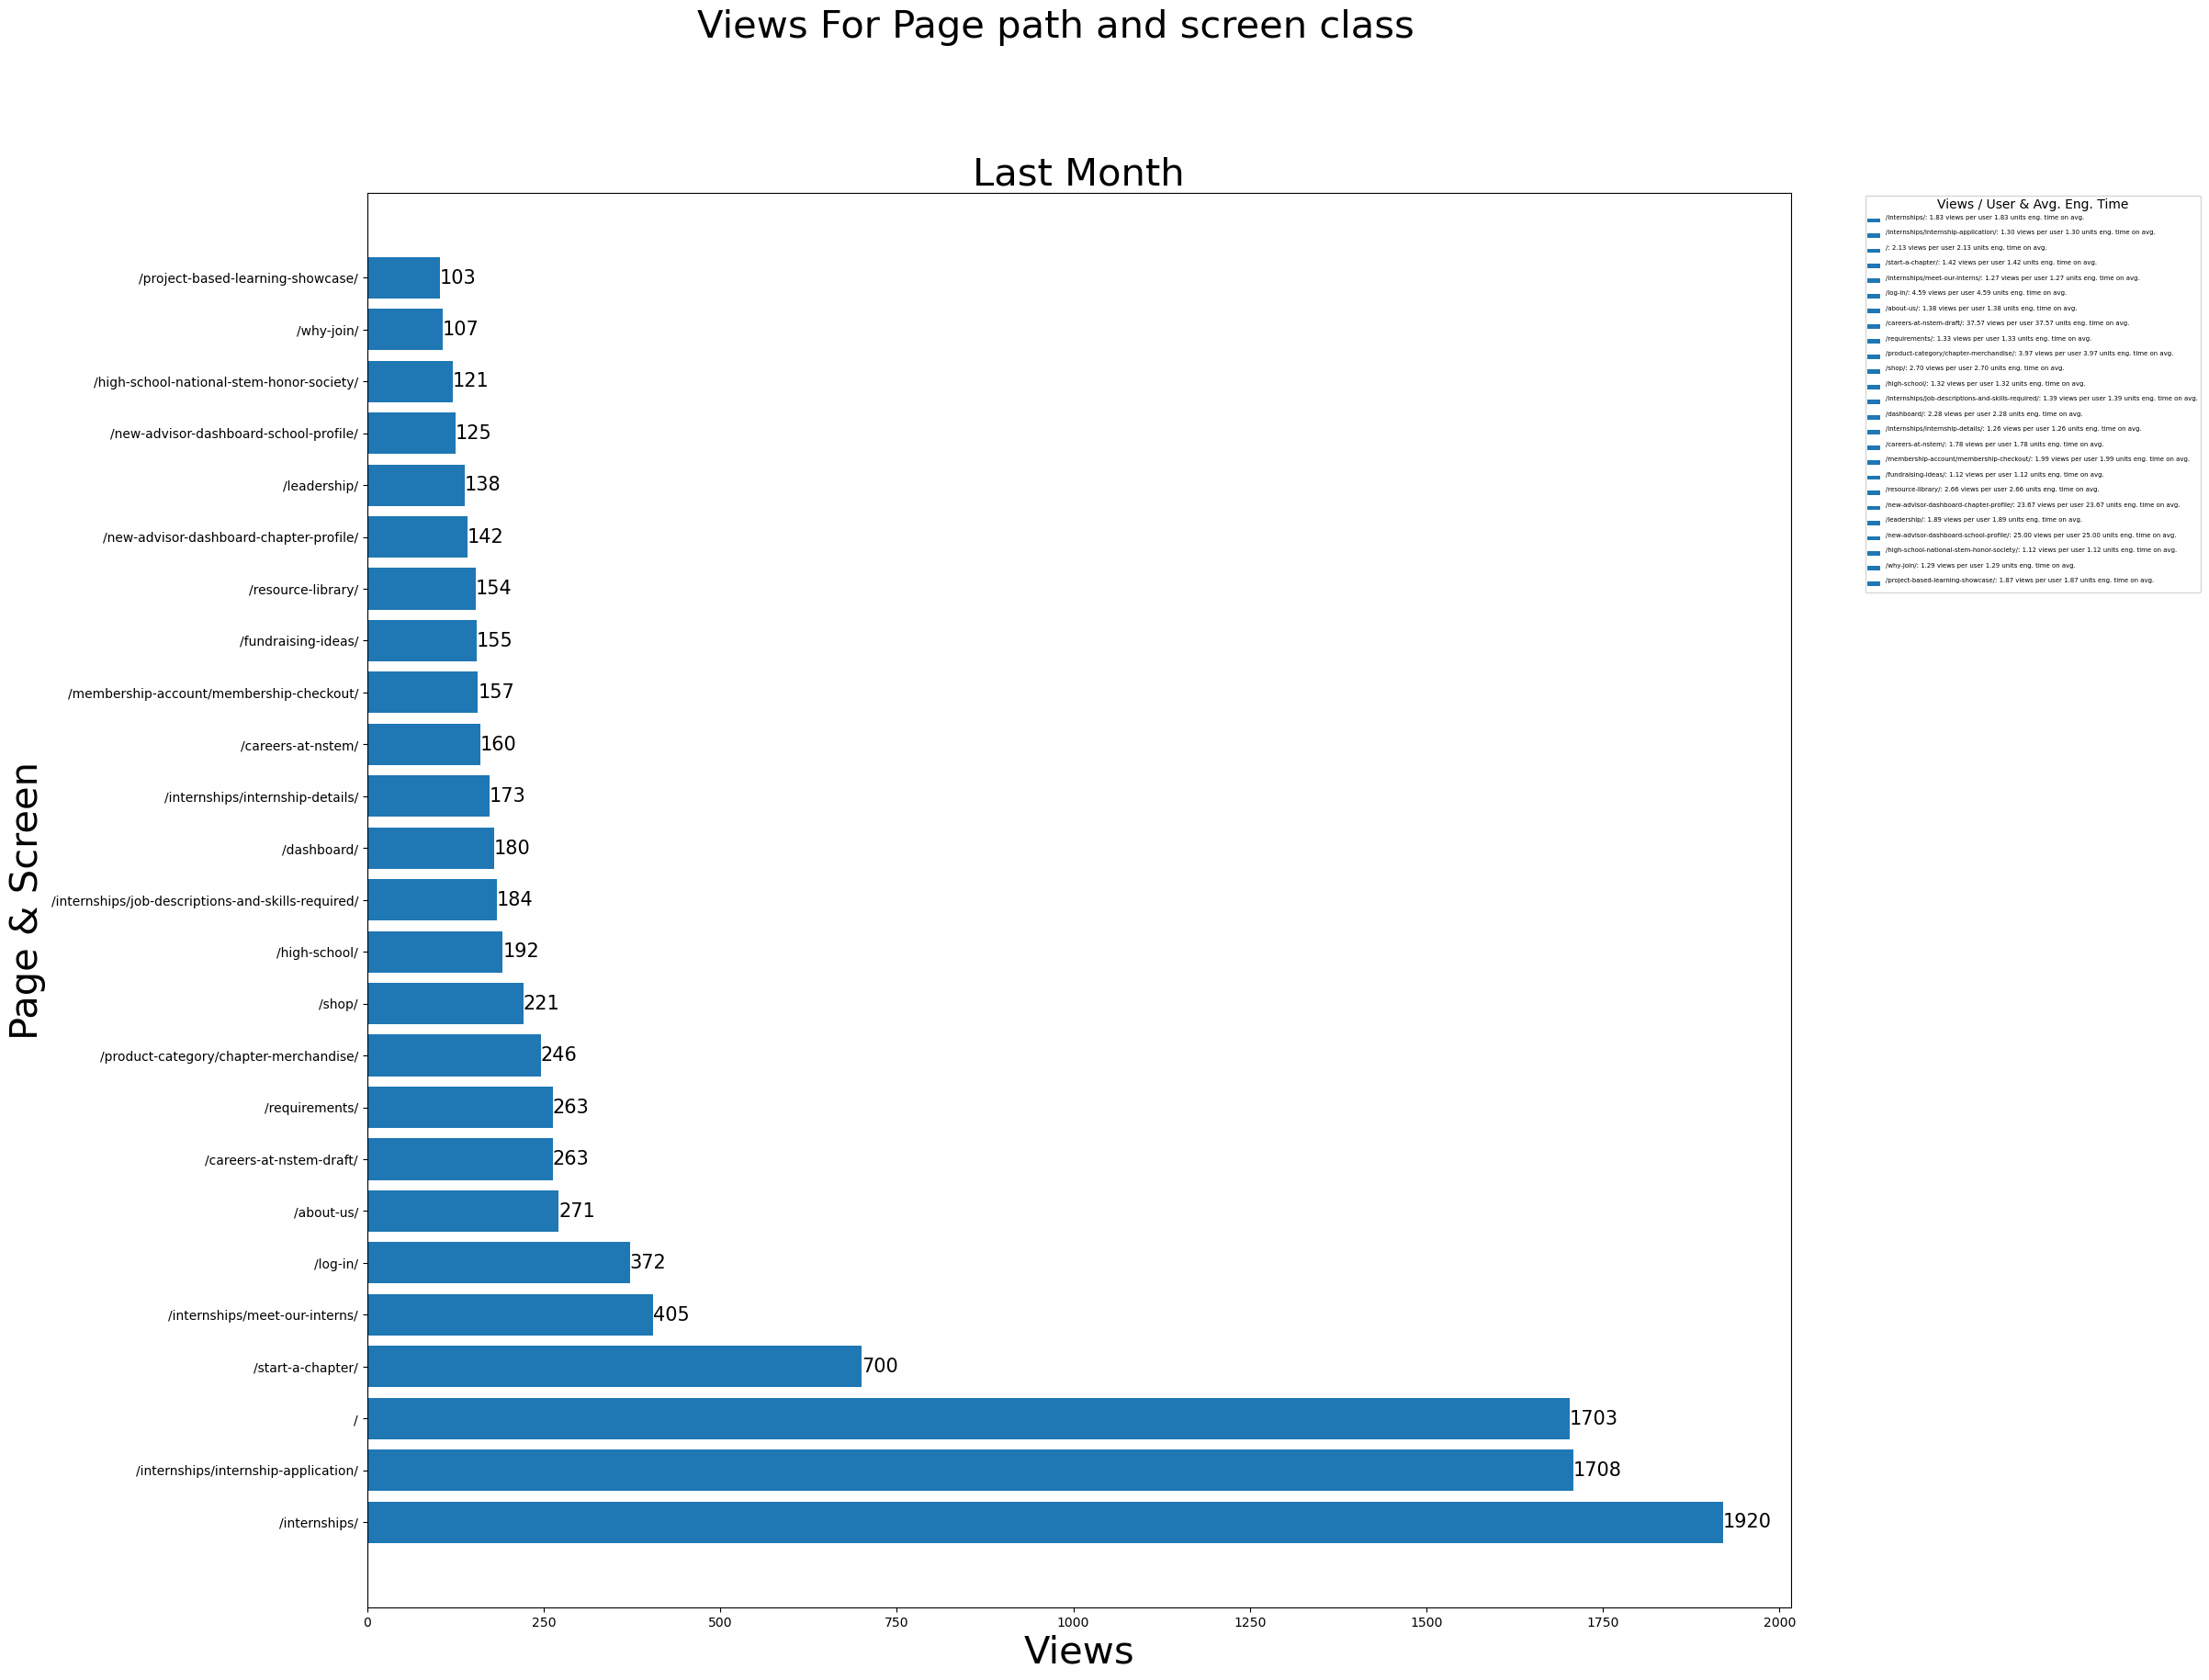

In [7]:
barplot_pagescreen("Views",col=df_month.columns[0])

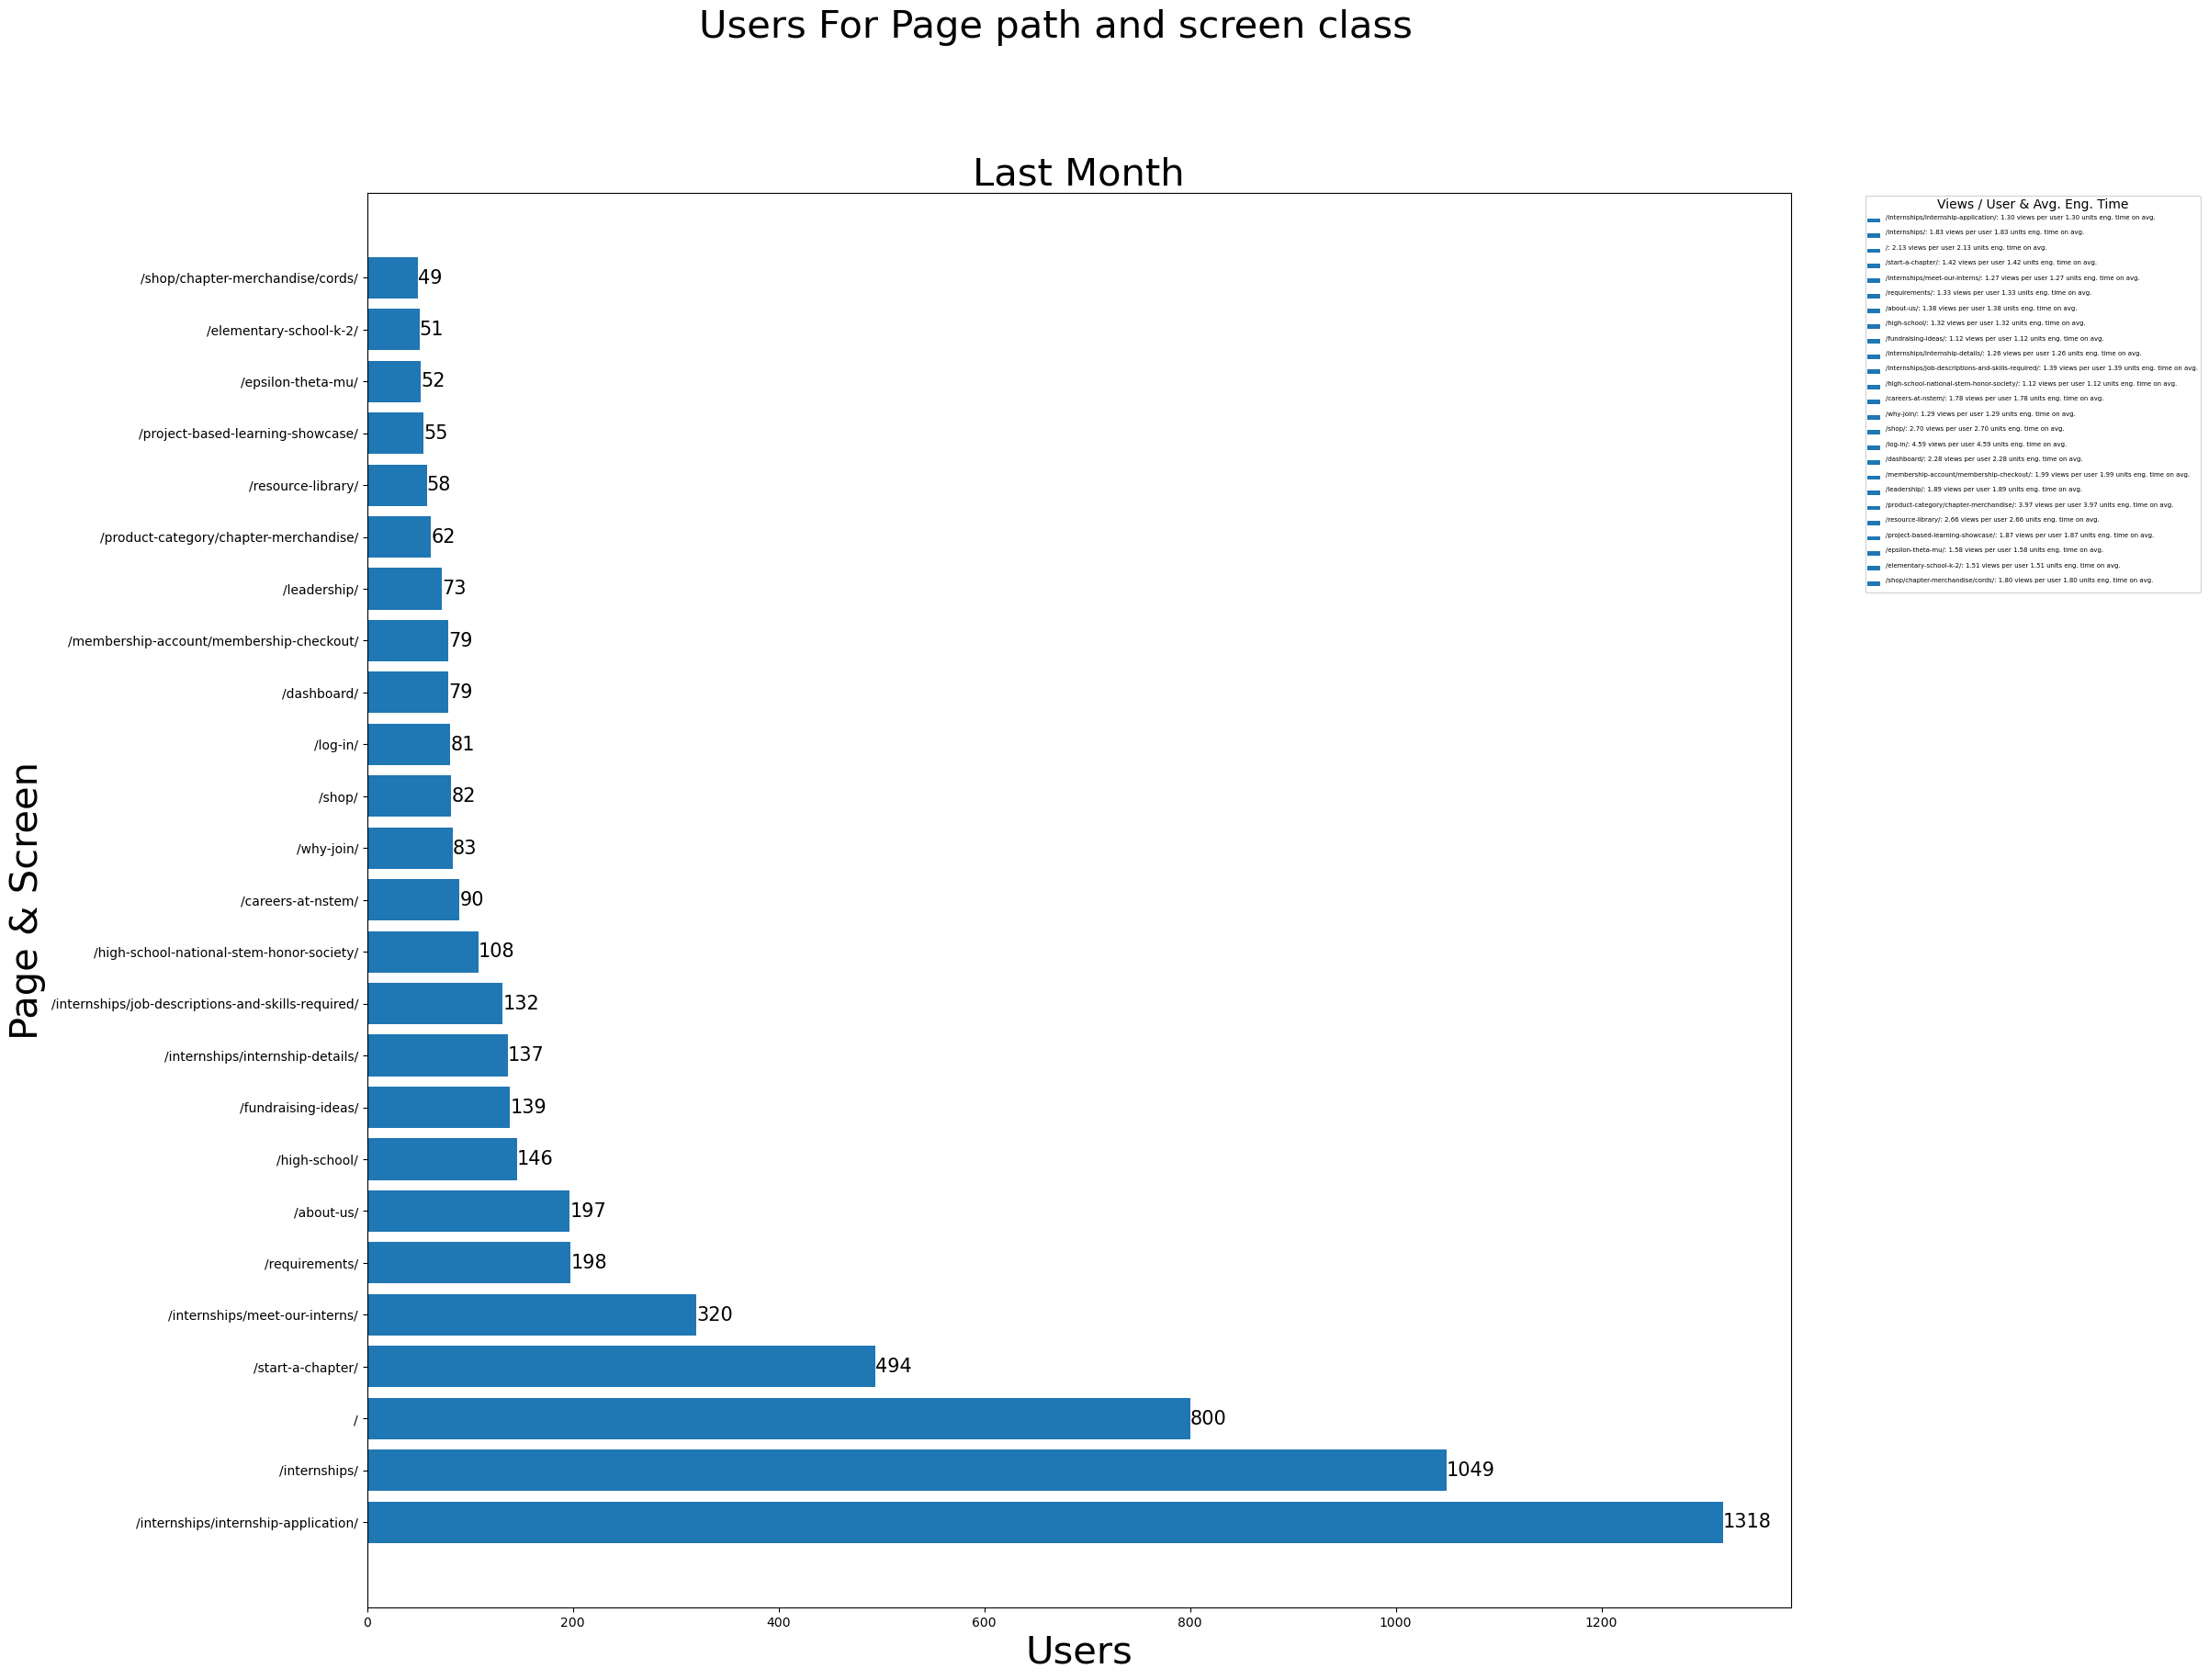

In [8]:
barplot_pagescreen("Users",col=df_month.columns[0])

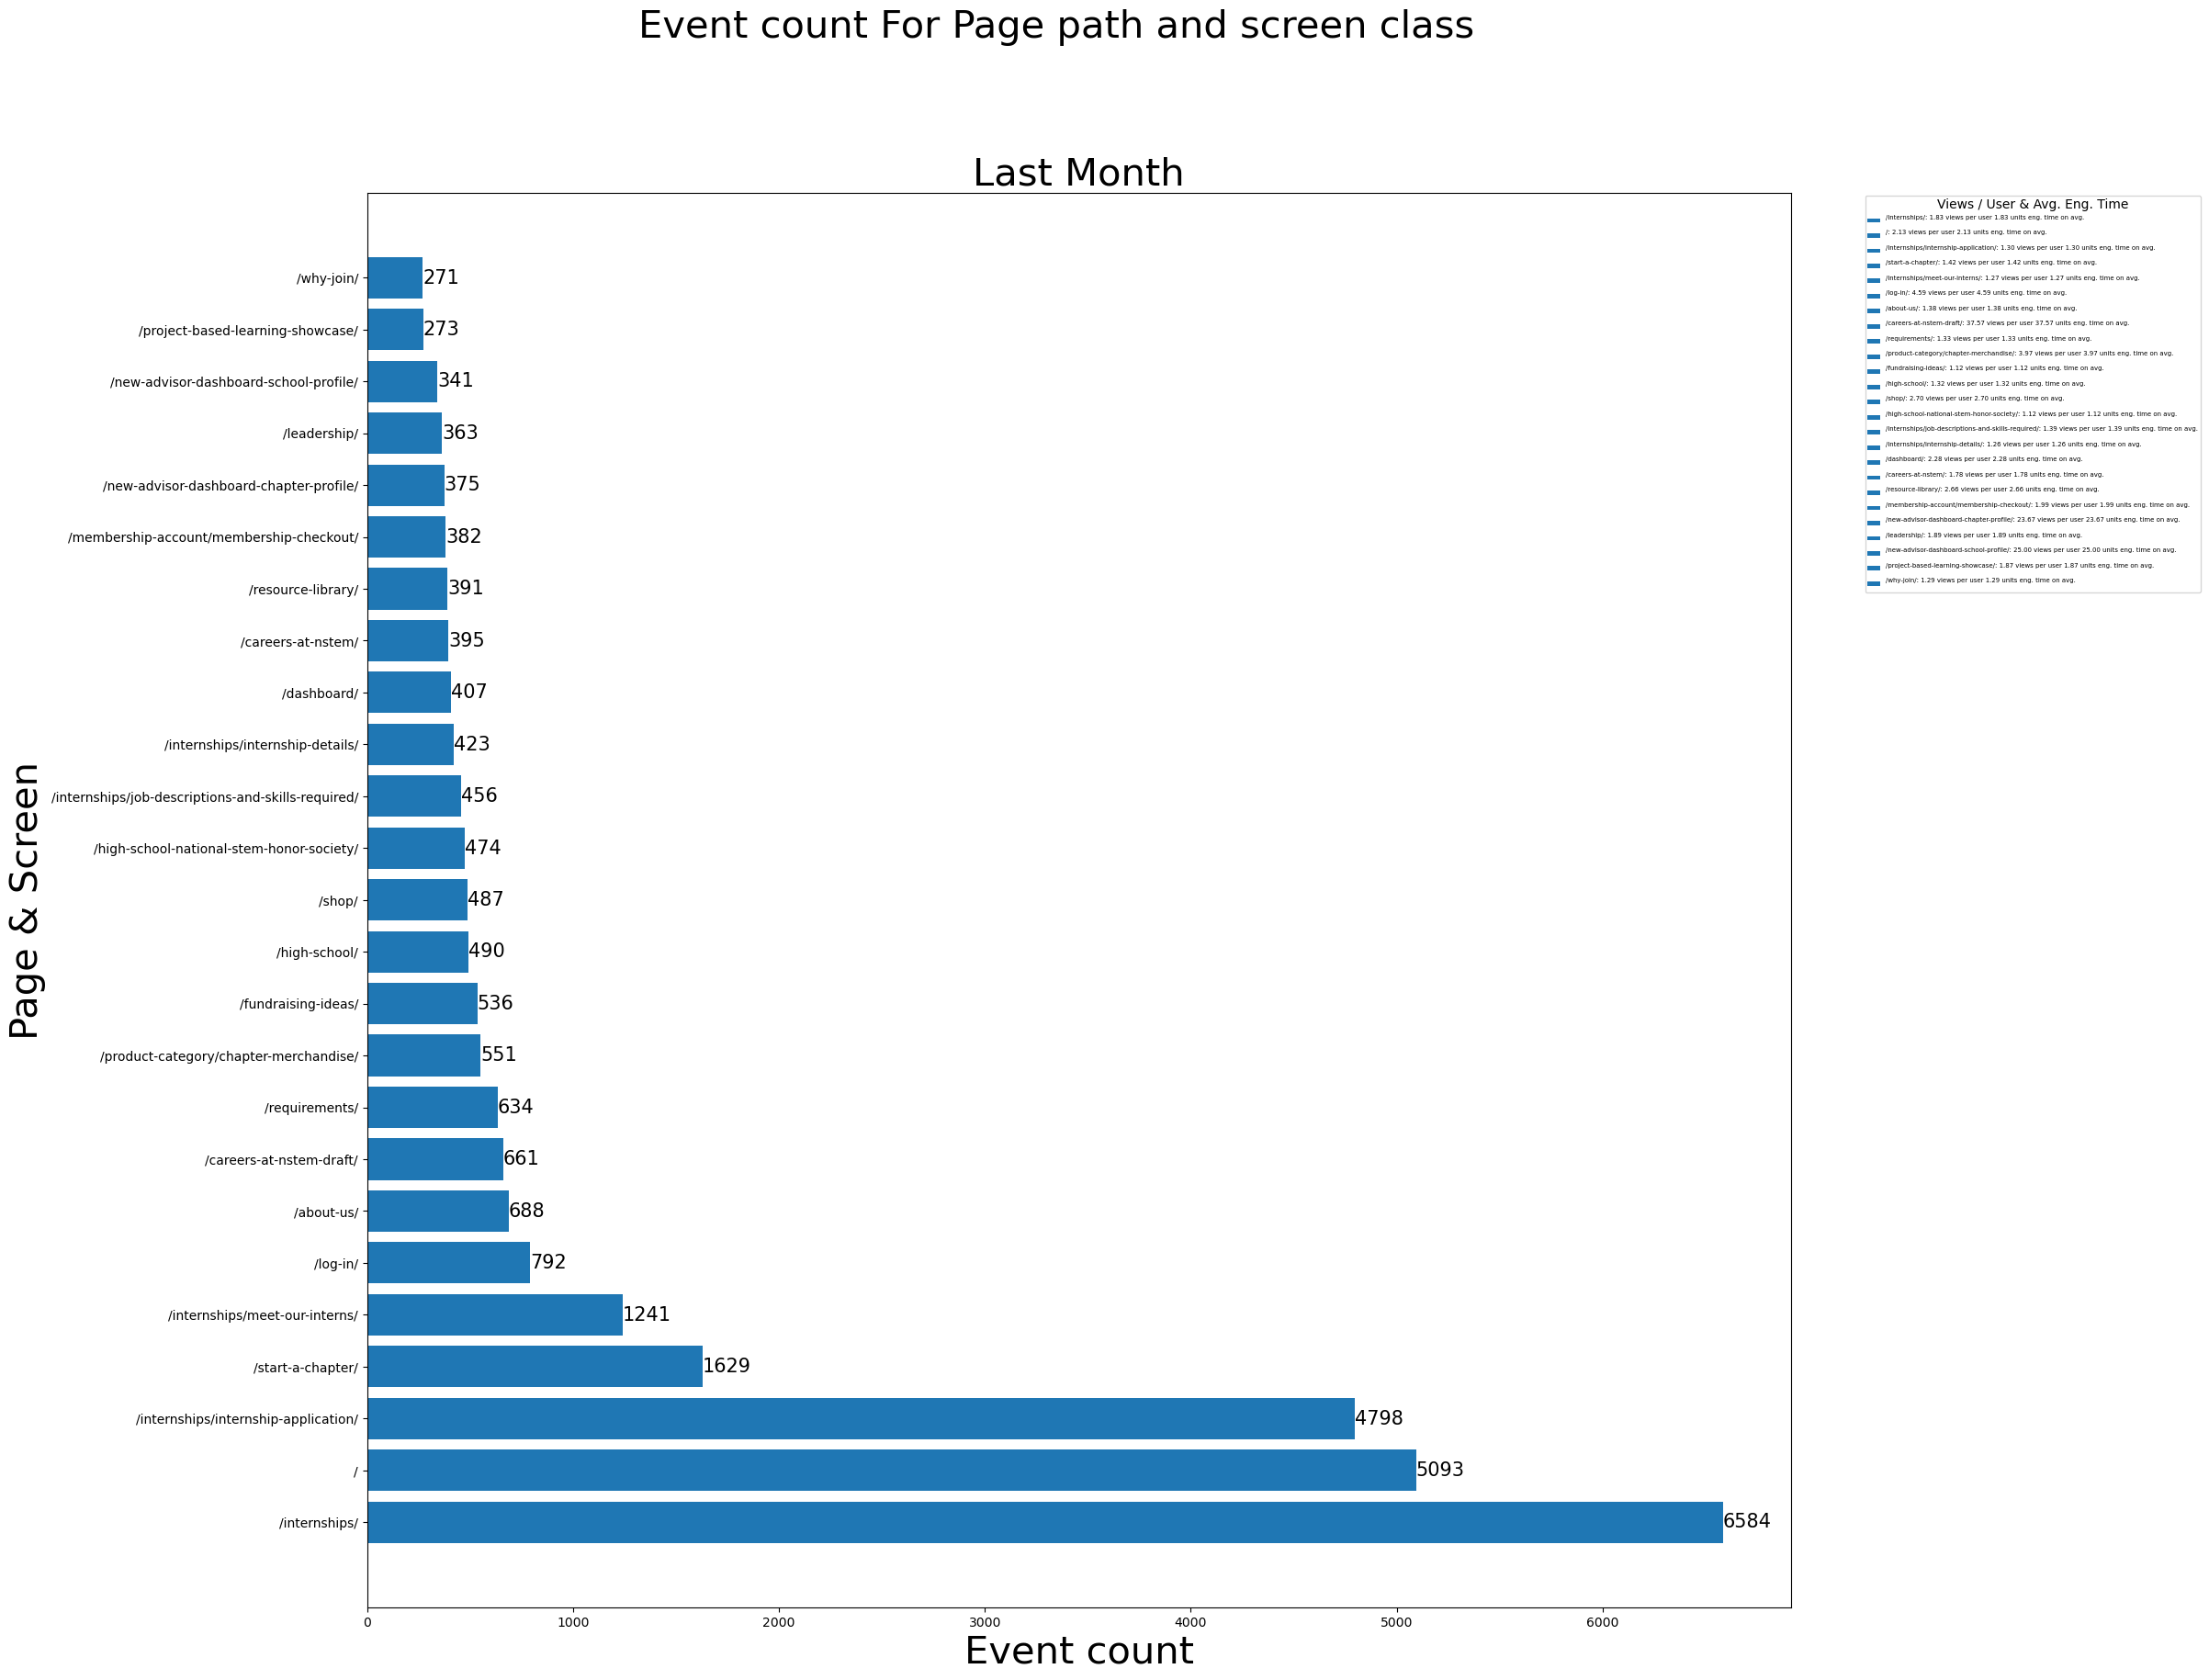

In [9]:
barplot_pagescreen("Event count",col=df_month.columns[0])

In [10]:
#Pie Chart For Three Periods
#Note that pie chart is used to show percentages
def pieplot_pagescreen(column,
                       col="Page path and screen class",#Display what metric we are analyzing
                       figsize1=20,#Figure's width
                       figsize2=20,#Figure's height
                       show=0.05,#Threshold of display of percentage
                       font=10,#Text fontsize, including labels & inside text
                       titlefont=20,#Title fontsize
                       subfont=20,#Subtitle fontsize
                       labeldisplay=5#Threshold to display the first labeldisplay largest's names
                       ):#When running functions, please adjust parameters if you want
    
    #Initialization
    plt.figure(figsize=(figsize1, figsize2))
    
    # Function to decide whether to display the percentage on the slice
    def autopct_format(values):
        def my_autopct(pct):
            total = sum(values)#Get total, values is a list of value
            val = int(round(pct*total/100.0))#Get percentage
            if val > (total * show):#If the slice is larger than 5% (default) of the total then display the percentage on plot
                return '{p:.2f}%'.format(p=pct)#Round to two decimal places
            else:
                return ''#Do not show
        return my_autopct
    
    #Construction of plots
    #Sort: make the dimension decreasing
    df = df_month.sort_values(by=column, ascending=False)
    labels_ = (df)[col]#Labels of pie chart, act as a vector
    labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest
    sizes = df[column]#Get exact values' list, for future text usage
    #We are interested in all now, since it is a pie chart
    #Draw pie chart according to percentage, set label size
    plt.pie(df[column], labels = labels_,textprops={'fontsize': font}, autopct=autopct_format(sizes))#autopct controls text inside
    plt.title(subtitle_comb,fontsize=titlefont)
    plt.suptitle(f"{column} For {col}",fontsize=subfont)
    
    #Show
    plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14580\1628741526.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


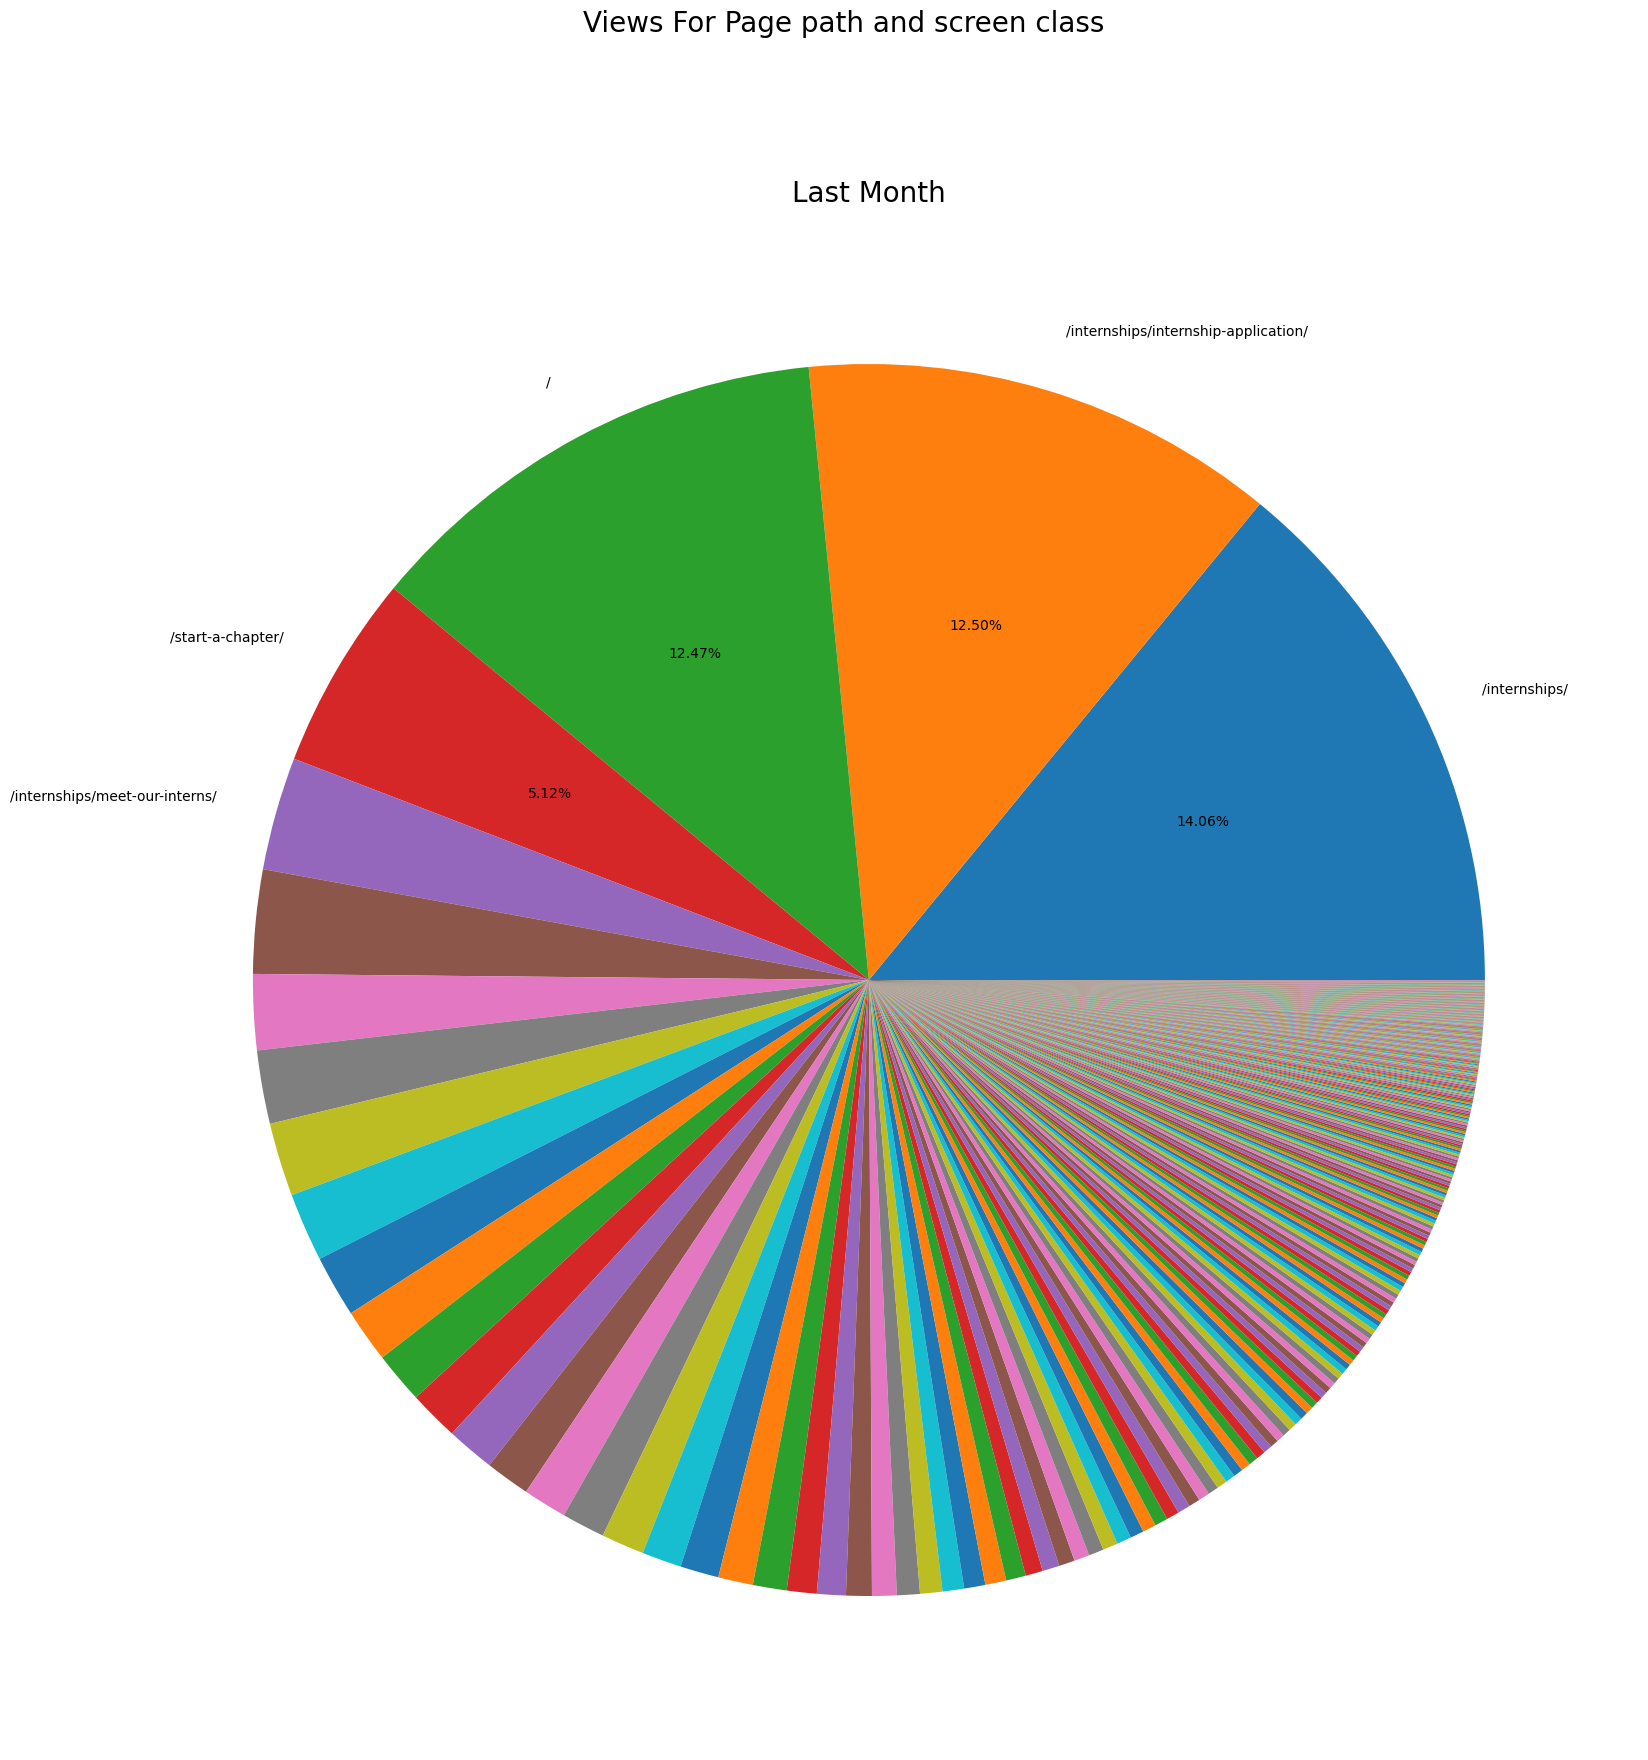

In [11]:
pieplot_pagescreen("Views",col=df_month.columns[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14580\1628741526.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


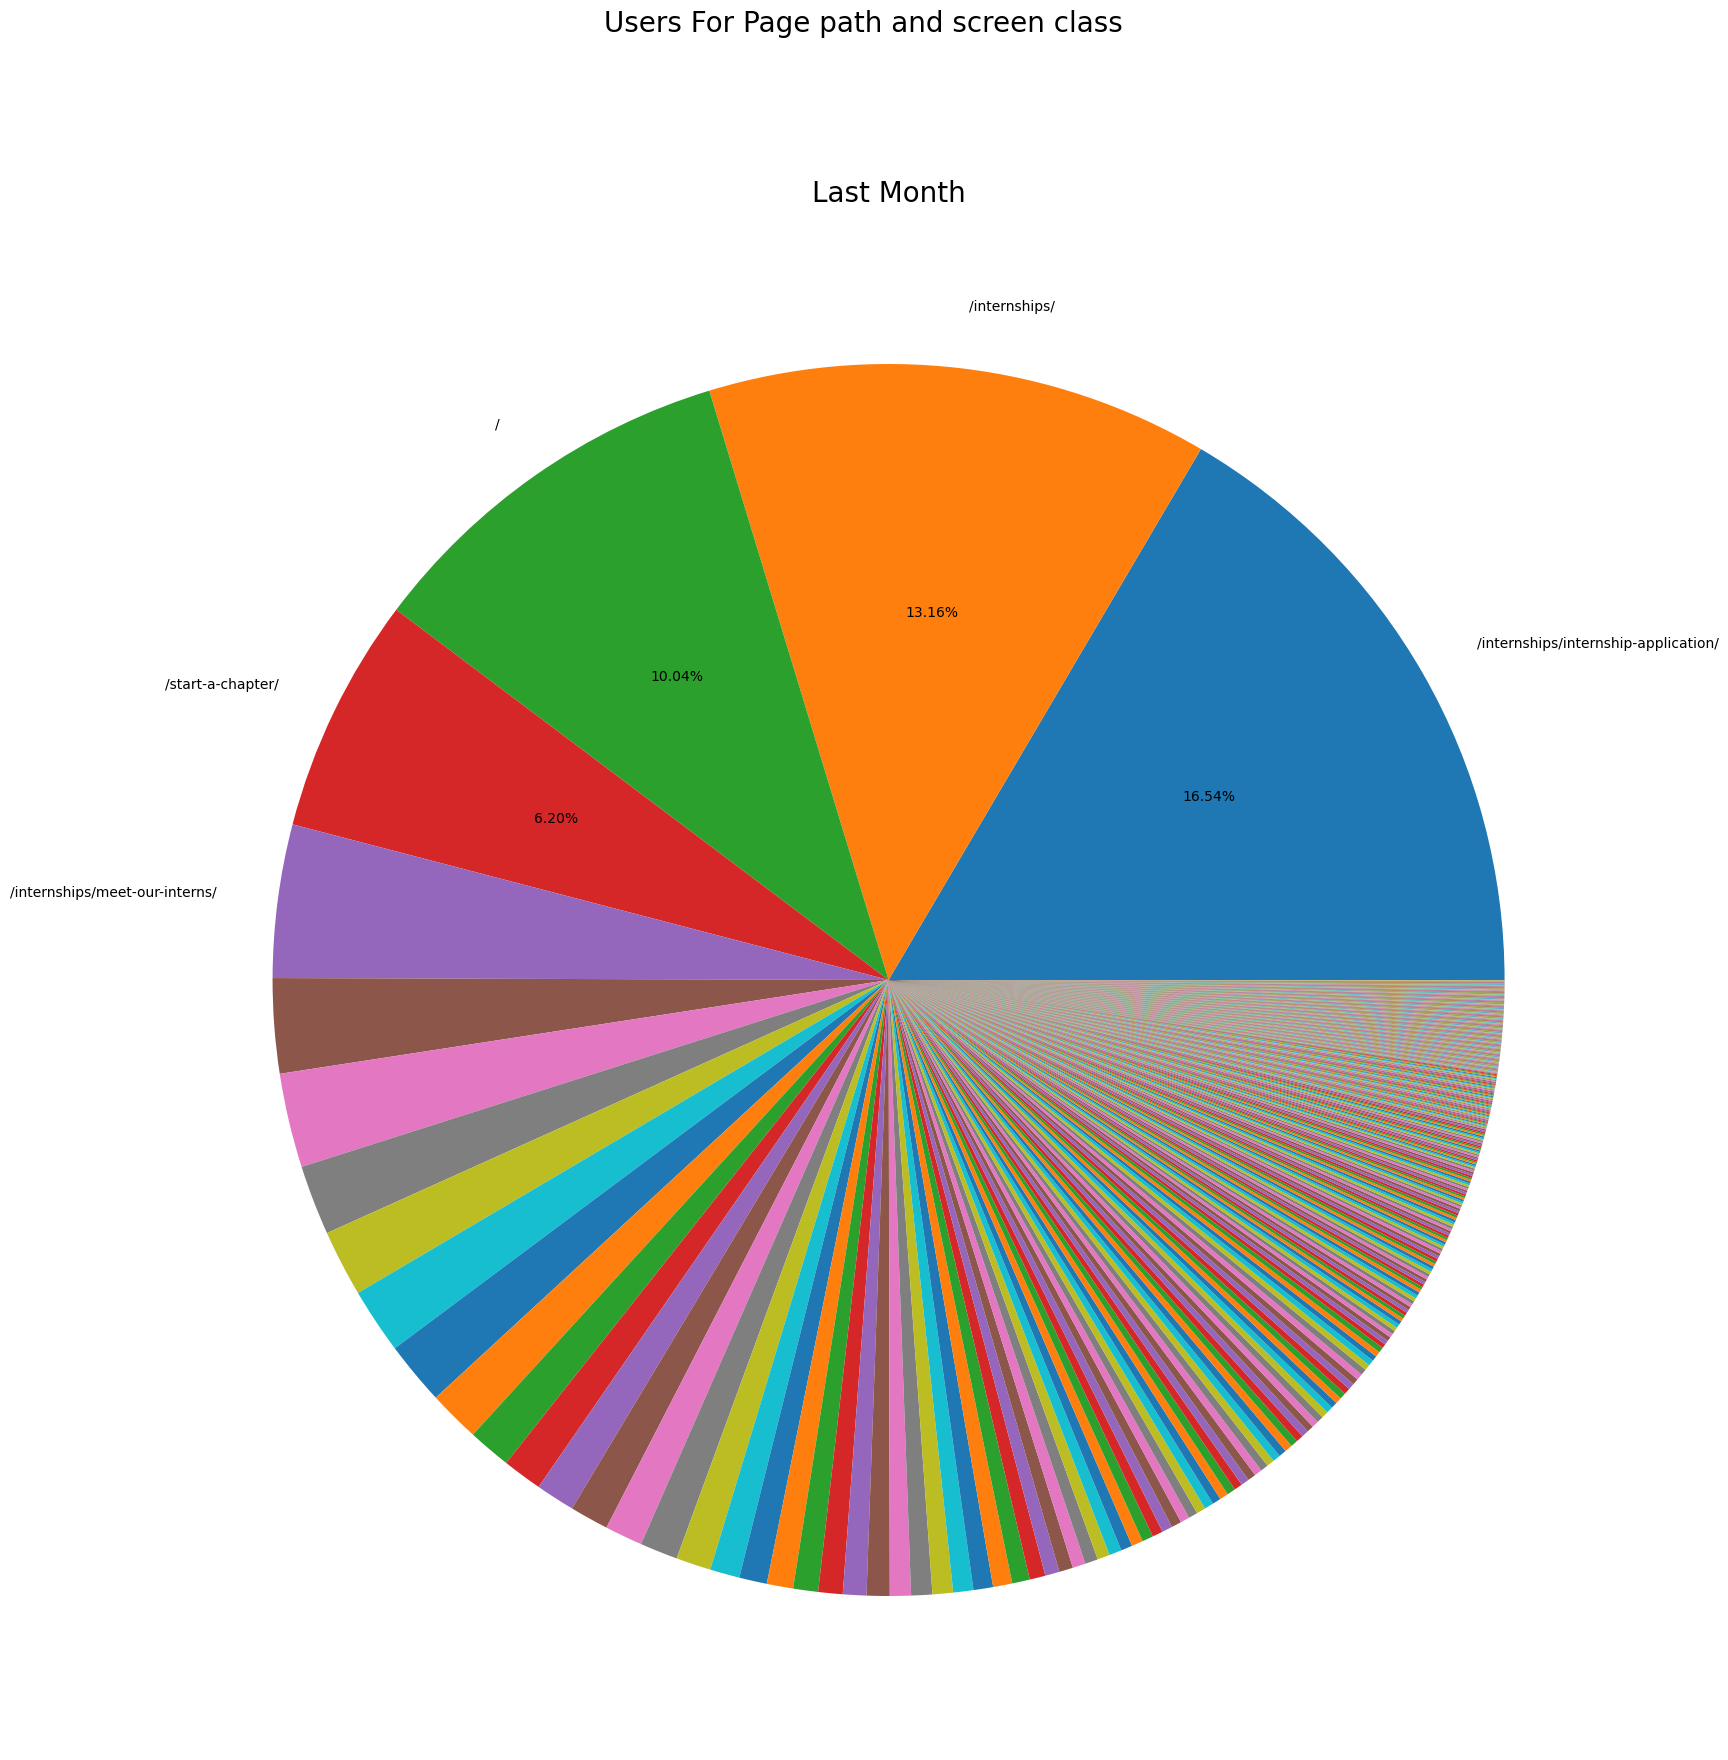

In [12]:
pieplot_pagescreen("Users",col=df_month.columns[0])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14580\1628741526.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_[labeldisplay:] = ""#Do not display label after the first 5 (default) largest


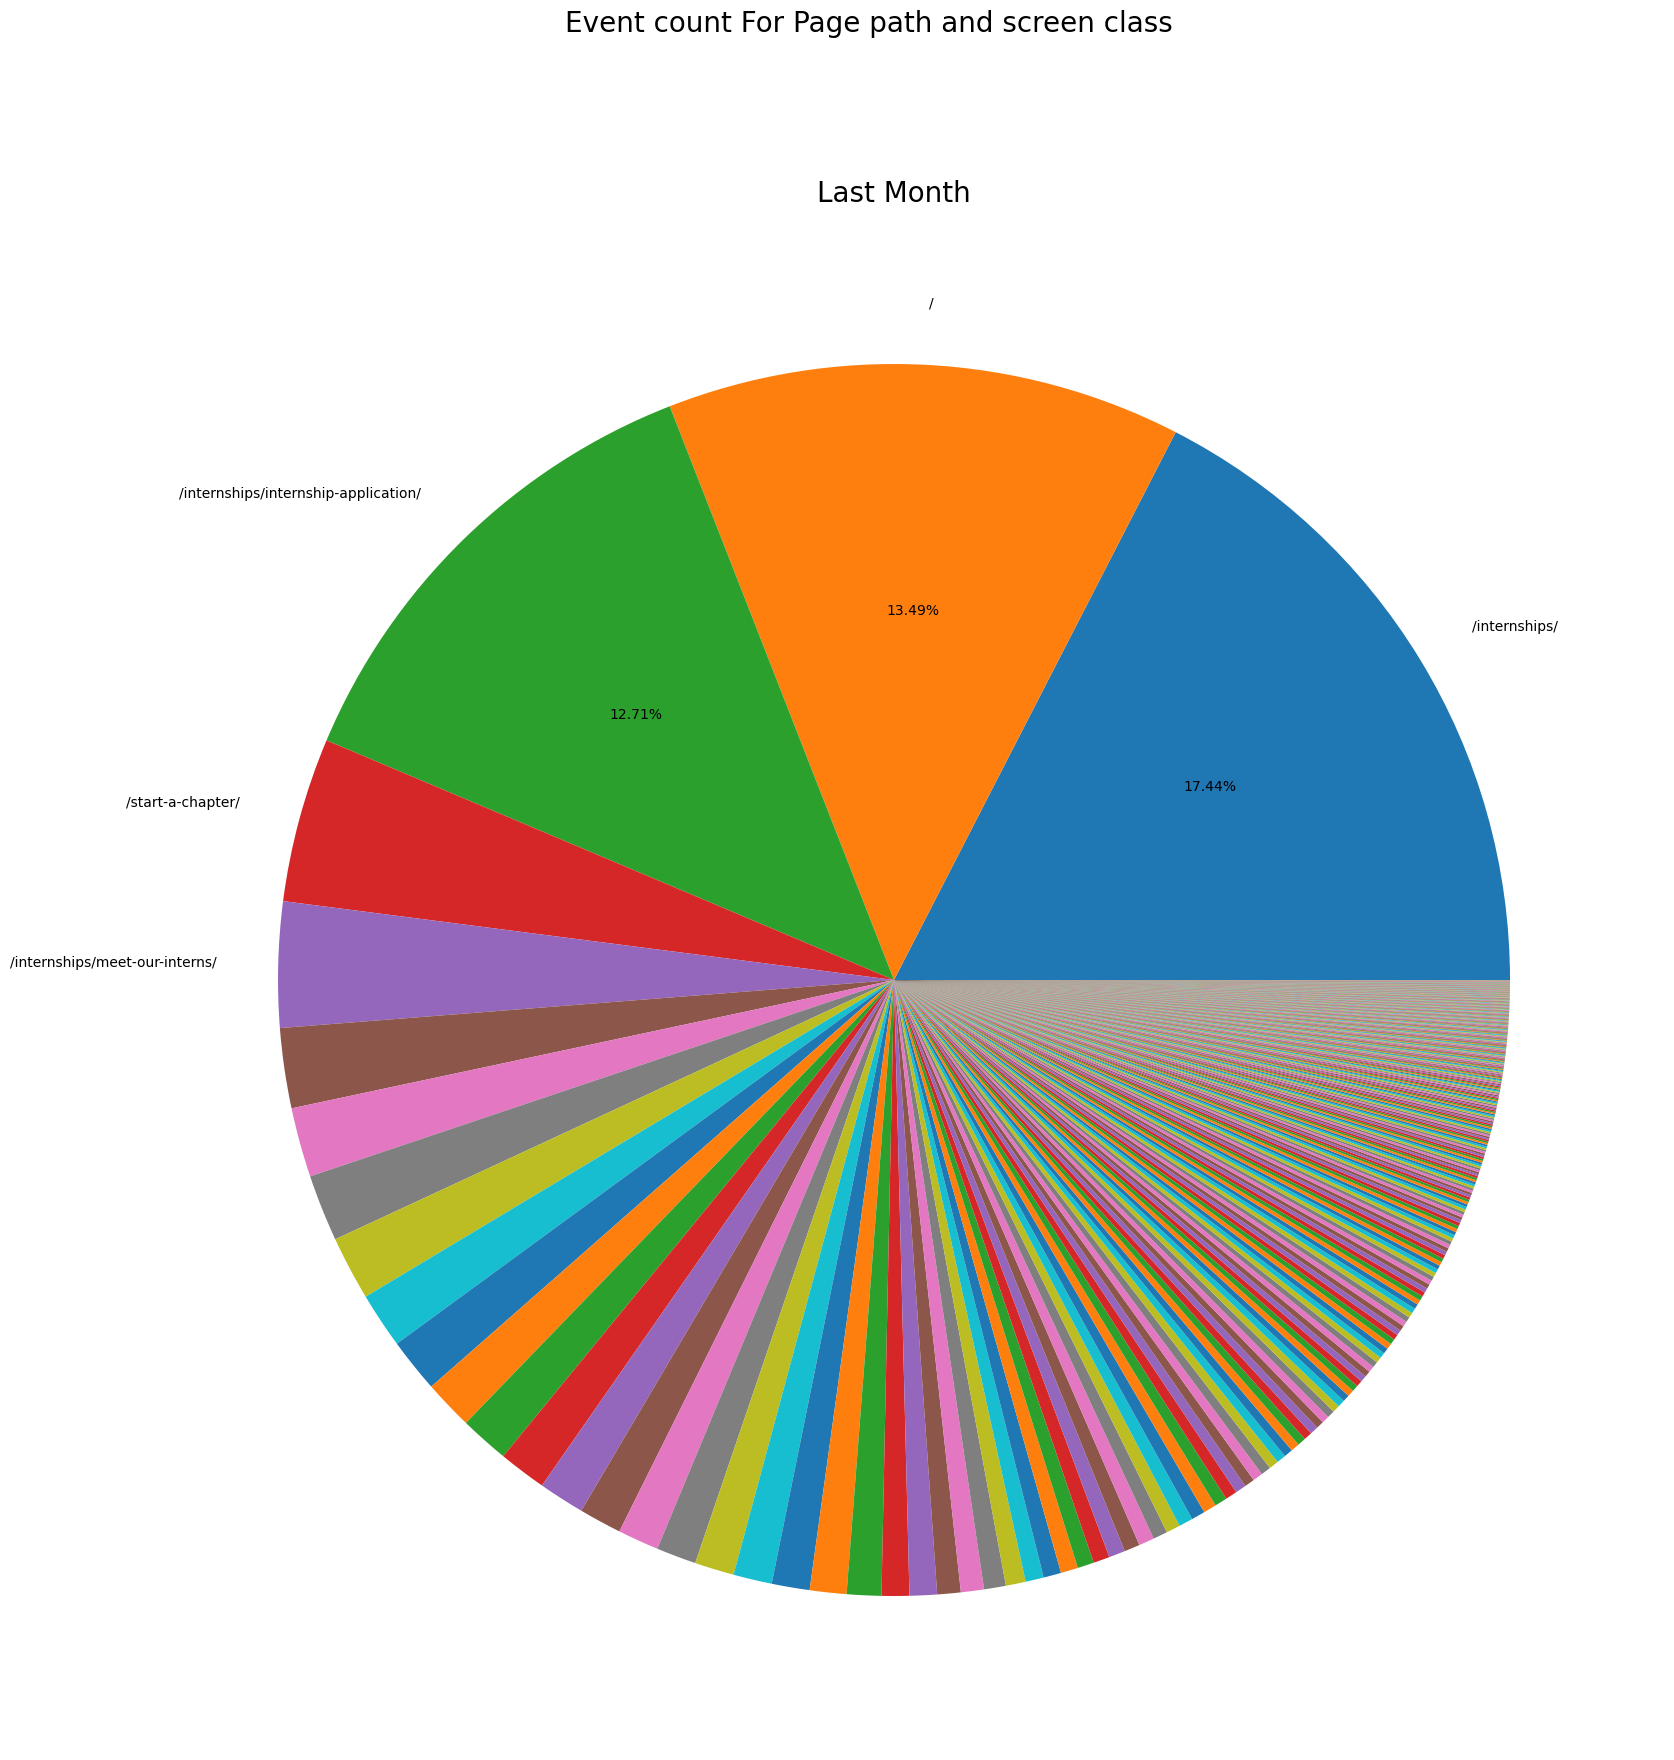

In [13]:
pieplot_pagescreen("Event count",col=df_month.columns[0])

In [14]:
#Click File on the topleft, then click Print Preview to show the output, then make screenshots!